### Market Basket Analysis with Python- Amazon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon=pd.read_csv("Amazon.csv")
amazon.head(5)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/08 7:50:55 PM GMT+5:30,65,Prefer not to say,Less than once a month,Clothing and Fashion,Yes,Multiple times a day,Keyword,Multiple pages,2,...,Yes,Moderately,No,2,Sometimes,4,4,Competitive prices,better app interface and lower shipping charges,778242
1,2023/06/09 9:37:44 AM GMT+5:30,20,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Filter,First page,3,...,Yes,Heavily,Yes,1,Sometimes,4,5,Quick delivery,Scrolling option would be much better than goi...,193482
2,2023/06/11 11:26:54 PM GMT+5:30,42,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Few times a week,Keyword,Multiple pages,2,...,Yes,Heavily,Sometimes,5,No,5,3,All the above,Nil,925975
3,2023/06/08 5:17:10 PM GMT+5:30,65,Others,Once a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,Filter,Multiple pages,2,...,Yes,Occasionally,No,3,Yes,1,2,Quick delivery,Quality of product is very poor according to t...,566872
4,2023/06/11 10:59:30 PM GMT+5:30,45,Female,Once a week,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,NaN,First page,5,...,Yes,Rarely,No,2,Yes,1,2,Quick delivery,Irrelevant product suggestions,683642


In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               800 non-null    object
 1   age                                     800 non-null    int64 
 2   Gender                                  800 non-null    object
 3   Purchase_Frequency                      800 non-null    object
 4   Purchase_Categories                     800 non-null    object
 5   Personalized_Recommendation_Frequency   800 non-null    object
 6   Browsing_Frequency                      800 non-null    object
 7   Product_Search_Method                   643 non-null    object
 8   Search_Result_Exploration               800 non-null    object
 9   Customer_Reviews_Importance             800 non-null    int64 
 10  Add_to_Cart_Browsing                    800 non-null    object
 11  Cart_C

##  Task 1: Data Cleaning and Preparation




In [4]:
## 1.1 : Remove duplicate or inconsistent survey responses.

amazon=amazon.drop_duplicates()
amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/08 7:50:55 PM GMT+5:30,65,Prefer not to say,Less than once a month,Clothing and Fashion,Yes,Multiple times a day,Keyword,Multiple pages,2,...,Yes,Moderately,No,2,Sometimes,4,4,Competitive prices,better app interface and lower shipping charges,778242
1,2023/06/09 9:37:44 AM GMT+5:30,20,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Filter,First page,3,...,Yes,Heavily,Yes,1,Sometimes,4,5,Quick delivery,Scrolling option would be much better than goi...,193482
2,2023/06/11 11:26:54 PM GMT+5:30,42,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Few times a week,Keyword,Multiple pages,2,...,Yes,Heavily,Sometimes,5,No,5,3,All the above,Nil,925975
3,2023/06/08 5:17:10 PM GMT+5:30,65,Others,Once a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,Filter,Multiple pages,2,...,Yes,Occasionally,No,3,Yes,1,2,Quick delivery,Quality of product is very poor according to t...,566872
4,2023/06/11 10:59:30 PM GMT+5:30,45,Female,Once a week,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,NaN,First page,5,...,Yes,Rarely,No,2,Yes,1,2,Quick delivery,Irrelevant product suggestions,683642


In [5]:
amazon=amazon.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/08 7:50:55 PM GMT+5:30,65,Prefer not to say,Less than once a month,Clothing and Fashion,Yes,Multiple times a day,Keyword,Multiple pages,2,...,Yes,Moderately,No,2,Sometimes,4,4,Competitive prices,better app interface and lower shipping charges,778242
1,2023/06/09 9:37:44 AM GMT+5:30,20,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Filter,First page,3,...,Yes,Heavily,Yes,1,Sometimes,4,5,Quick delivery,Scrolling option would be much better than goi...,193482
2,2023/06/11 11:26:54 PM GMT+5:30,42,Male,Once a week,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Few times a week,Keyword,Multiple pages,2,...,Yes,Heavily,Sometimes,5,No,5,3,All the above,Nil,925975
3,2023/06/08 5:17:10 PM GMT+5:30,65,Others,Once a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,Filter,Multiple pages,2,...,Yes,Occasionally,No,3,Yes,1,2,Quick delivery,Quality of product is very poor according to t...,566872
4,2023/06/11 10:59:30 PM GMT+5:30,45,Female,Once a week,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,NaN,First page,5,...,Yes,Rarely,No,2,Yes,1,2,Quick delivery,Irrelevant product suggestions,683642


In [ ]:
## 1.2 : Standardize categorical entries (e.g., frequency levels, gender, recommendation responses).


In [6]:
## 1.3 Handle missing values and inconsistent formats in Product_Search_Method and other fields.
amazon["Product_Search_Method"] = (amazon["Product_Search_Method"].fillna("Unknown"))
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               800 non-null    object
 1   age                                     800 non-null    int64 
 2   Gender                                  800 non-null    object
 3   Purchase_Frequency                      800 non-null    object
 4   Purchase_Categories                     800 non-null    object
 5   Personalized_Recommendation_Frequency   800 non-null    object
 6   Browsing_Frequency                      800 non-null    object
 7   Product_Search_Method                   800 non-null    object
 8   Search_Result_Exploration               800 non-null    object
 9   Customer_Reviews_Importance             800 non-null    int64 
 10  Add_to_Cart_Browsing                    800 non-null    object
 11  Cart_C

In [23]:
## 1.4 : Rename duplicate or misformatted columns (e.g., remove trailing spaces in Rating_Accuracy ).
amazon= amazon.loc[:, ~amazon.columns.duplicated()]
amazon.duplicated().sum()

np.int64(0)

In [7]:
## 1.5 : Convert numerical rating columns (e.g., Customer_Reviews_Importance, Shopping_Satisfaction) to appropriate numeric types for analysis.

rating_cols = ["Customer_Reviews_Importance","Rating_Accuracy","Shopping_Satisfaction","transaction"]
for col in rating_cols:
    if col in amazon.columns:
        amazon[col] = pd.to_numeric(amazon[col], errors="coerce")

In [ ]:
## Task 2 : Descriptive Behavior Analysis

Age Summary:
count    800.000000
mean      35.170000
std       18.916485
min        3.000000
25%       19.000000
50%       35.500000
75%       51.000000
max       67.000000
Name: age, dtype: float64

Gender Distribution:
Gender
Male                 209
Others               202
Female               197
Prefer not to say    192
Name: count, dtype: int64


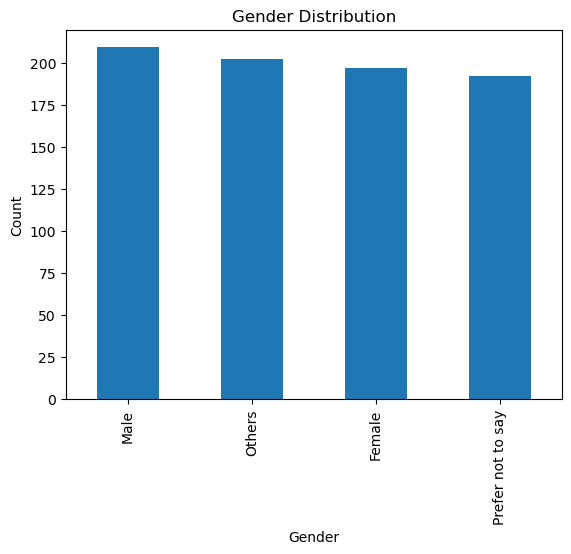

In [8]:
## 2.1 : Summarize customer demographics (age, gender distribution).
print("Age Summary:")
print(amazon["age"].describe())
print("\nGender Distribution:")
print(amazon["Gender"].value_counts())
amazon["Gender"].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Purchase Frequency Distribution:
Purchase_Frequency
Once a month              168
Multiple times a week     159
Once a week               159
Few times a month         158
Less than once a month    156
Name: count, dtype: int64


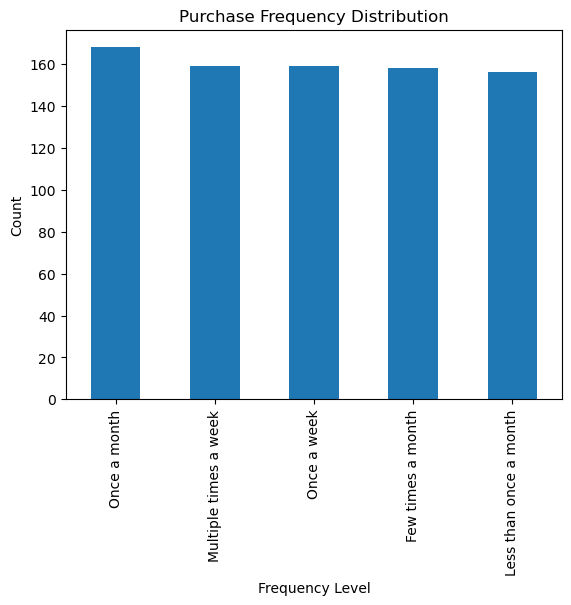

In [9]:
## 2.2 : Analyze overall purchase frequency and most popular product categories.
print("\nPurchase Frequency Distribution:")
print(amazon["Purchase_Frequency"].value_counts())
amazon["Purchase_Frequency"].value_counts().plot(kind='bar')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Frequency Level")
plt.ylabel("Count")
plt.show()

In [18]:
categories = [
    'Clothing and Fashion',
    'Beauty and Personal Care',
    'Groceries and Gourmet Food',
    'Home and Kitchen',
    'others'
]

for cat in categories:
    col_name = cat.replace(' ', '_').title().replace('_', '_')
    amazon[col_name] = amazon['Purchase_Categories'].str.contains(cat, regex=False).astype(int)


In [20]:
category_cols = [
    'Clothing_And_Fashion',
    'Beauty_And_Personal_Care',
    'Groceries_And_Gourmet_Food',
    'Home_And_Kitchen',
    'Others'
]

category_popularity = (
    amazon[category_cols]
    .sum()
    .sort_values(ascending=False)
)

print(category_popularity)


Clothing_And_Fashion          450
Others                        412
Home_And_Kitchen              391
Beauty_And_Personal_Care      383
Groceries_And_Gourmet_Food    369
dtype: int64


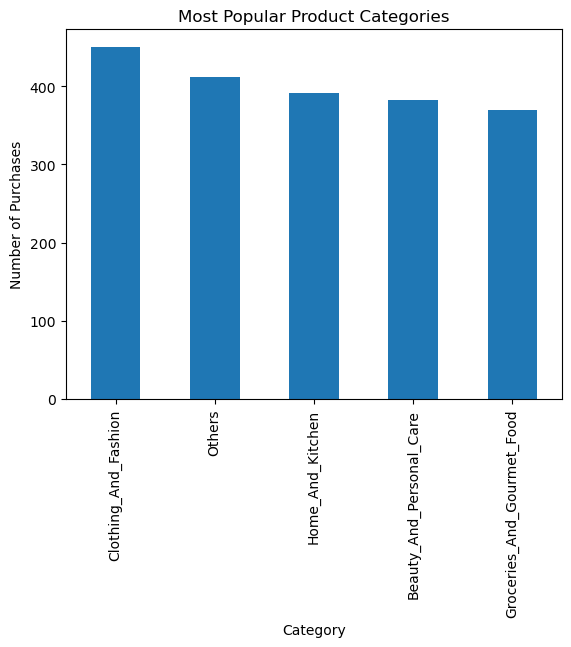

In [21]:
import matplotlib.pyplot as plt

category_popularity.plot(kind='bar')
plt.title('Most Popular Product Categories')
plt.ylabel('Number of Purchases')
plt.xlabel('Category')
plt.show()


In [24]:
## task 2.3 : Identify top browsing methods

top_browsing_methods = (amazon['Product_Search_Method'].value_counts())

print(top_browsing_methods)


Product_Search_Method
Keyword       170
categories    163
Filter        161
Unknown       157
others        149
Name: count, dtype: int64


In [25]:
## task 2.3 : Identify most common cart abandonment factors.

top_abandonment_factors = (amazon['Cart_Abandonment_Factors'].value_counts())

print(top_abandonment_factors)


Cart_Abandonment_Factors
High shipping costs                           224
Found a better price elsewhere                206
Changed my mind or no longer need the item    194
others                                        176
Name: count, dtype: int64


In [58]:
## Task 2.4 : calculate mean and median for Shopping_Satisfaction.

amazon['Shopping_Satisfaction'].agg(['mean', 'median'])

mean      3.0125
median    3.0000
Name: Shopping_Satisfaction, dtype: float64

In [59]:
## Task 2.4 : calculate mean and median for Rating_Accuracy
amazon['Rating_Accuracy '].agg(['mean', 'median'])

mean      2.96875
median    3.00000
Name: Rating_Accuracy , dtype: float64

In [60]:
## Task 2.4 : calculate mean and median for Personalized_Recommendation_Frequency
amazon['Personalized_Recommendation_Frequency '].agg(['mean', 'median'])

mean      2.9525
median    3.0000
Name: Personalized_Recommendation_Frequency , dtype: float64


Purchase_Frequency Distribution:
Purchase_Frequency
Once a month              168
Multiple times a week     159
Once a week               159
Few times a month         158
Less than once a month    156
Name: count, dtype: int64

Browsing_Frequency Distribution:
Browsing_Frequency
Rarely                  231
Few times a month       200
Few times a week        186
Multiple times a day    183
Name: count, dtype: int64


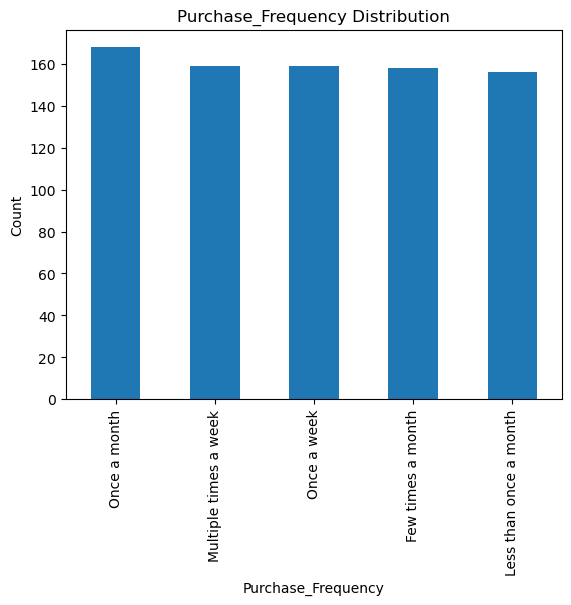

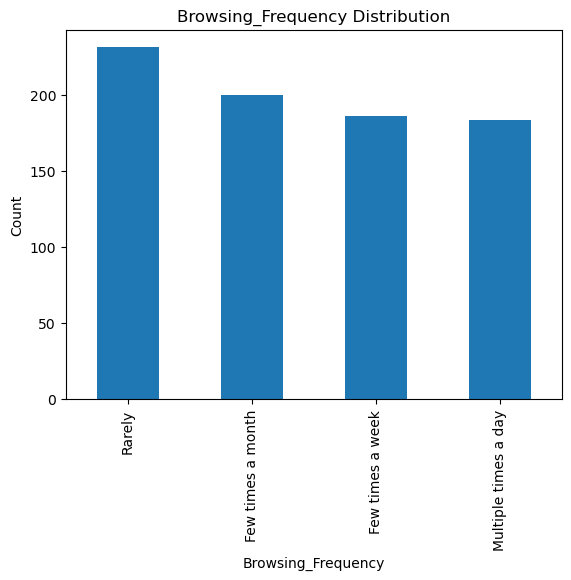

In [51]:
## Generate summary statistics and visualizations for key behavioral variables.

behavioral_cols = ['Purchase_Frequency','Browsing_Frequency','Personalized_Recommendation_Frequency','Shopping_Satisfaction','Rating_Accuracy']
categorical_cols = ['Purchase_Frequency','Browsing_Frequency']

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(amazon[col].value_counts())

import matplotlib.pyplot as plt

for col in categorical_cols:
    amazon[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


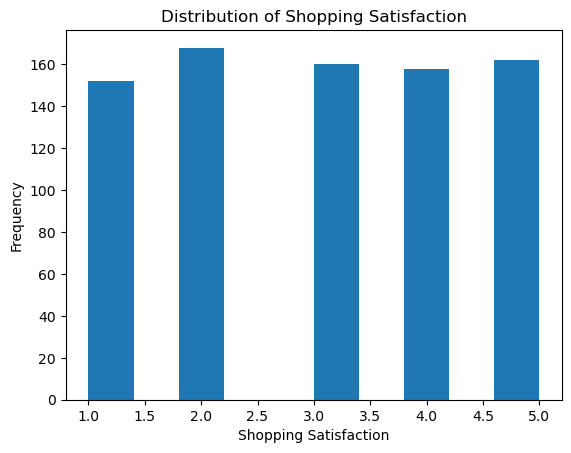

In [54]:

# Plot histogram
plt.figure()
plt.hist(amazon['Shopping_Satisfaction'].dropna(), bins=10)
plt.title('Distribution of Shopping Satisfaction')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Frequency')
plt.show()


In [79]:
## Task 3: Customer Segmentation and Profiling (K-mean clustering)

## Segment customers based on purchase frequency and shopping satisfaction levels.

freq_order= {'Less than once a month': 'Low',                            ## low
             'Once a month': 'Medium', 'Few times a month': 'Medium',    ## medium
             'Once a week': 'High','Multiple times a week': 'High'}   ## high

amazon['Purchase_Frequency_Level'] = amazon['Purchase_Frequency'].map(freq_order)


In [80]:

high_sat = amazon['Shopping_Satisfaction'].quantile(0.66)
moderate_sat = amazon['Shopping_Satisfaction'].quantile(0.33)


In [81]:
'''Frequent Buyers:     High purchase frequency, high satisfaction.
   Occasional Shoppers: Medium frequency, moderate satisfaction.
   At-Risk Customers:   Low satisfaction 
   others :             Low purchase frequency'''

def segment_customer(row):
    
    if row['Purchase_Frequency_Level'] == 'High' and row['Shopping_Satisfaction'] >= high_sat:
        return 'Frequent Buyers'   
    elif row['Purchase_Frequency_Level'] == 'Medium' and moderate_sat <= row['Shopping_Satisfaction'] < high_sat:
        return 'Occasional Shoppers'
    else:
        return 'At-Risk Customers'

amazon['Customer_Segment'] = amazon.apply(segment_customer, axis=1)
amazon['Customer_Segment'].value_counts()

Customer_Segment
At-Risk Customers      527
Occasional Shoppers    138
Frequent Buyers        135
Name: count, dtype: int64

In [82]:
## Segment Profile Summary

segment_profile = (amazon.groupby('Customer_Segment').agg(Avg_Satisfaction=('Shopping_Satisfaction', 'mean'),
                   Customers=('Customer_Segment', 'count')))
print(segment_profile)


                     Avg_Satisfaction  Customers
Customer_Segment                                
At-Risk Customers            2.774194        527
Frequent Buyers              4.511111        135
Occasional Shoppers          2.456522        138


In [ ]:
## Task 3.4 : Use clustering (K-Means) for behavioral grouping based on survey responses

In [92]:
## Purchase_Frequency - numerical input 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
amazon['Purchase_Frequency_Encoded'] = le.fit_transform(amazon['Purchase_Frequency_Level'])


In [93]:
features = ['Purchase_Frequency_Encoded','Shopping_Satisfaction']
x=amazon[features]
x.head()

,Purchase_Frequency_Encoded,Shopping_Satisfaction
0,1,4
1,0,5
2,0,3
3,2,2
4,0,2


In [94]:
x.shape

(800, 2)

In [95]:
x.isnull().sum()

Purchase_Frequency_Encoded    0
Shopping_Satisfaction         0
dtype: int64

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

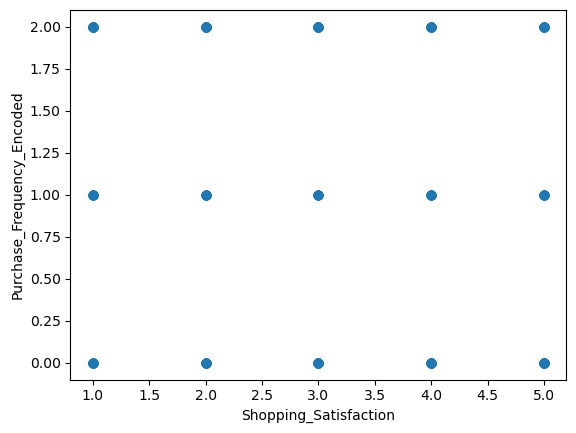

In [105]:
plt.scatter(x['Shopping_Satisfaction'],x['Purchase_Frequency_Encoded'])
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Purchase_Frequency_Encoded')
plt.show()

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,20): # i = no of clusters,i=1,2,3,...19
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Optimal number of cluster = 9

In [113]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at K={i}',silhouette_score(x,m.labels_))

Silhoutte Score at K=2 0.4709665705765465
Silhoutte Score at K=3 0.4588687857381221
Silhoutte Score at K=4 0.4373308764146542
Silhoutte Score at K=5 0.5226437550815567
Silhoutte Score at K=6 0.5461076692687525
Silhoutte Score at K=7 0.5937953400757913
Silhoutte Score at K=8 0.6375786587215437
Silhoutte Score at K=9 0.6954006257390019


In [114]:
k9 = KMeans(n_clusters=9)
k9.fit(x)
ypred9 = k9.predict(x)
print(ypred9)

[1 3 2 6 5 8 8 0 5 8 1 2 8 0 4 5 5 6 5 5 6 8 3 5 0 5 8 7 2 3 0 1 6 1 4 8 8
 4 0 8 2 3 2 7 2 1 3 7 4 3 3 7 5 4 1 1 3 4 8 3 7 2 7 3 3 8 1 8 1 0 1 7 4 6
 4 0 0 8 0 1 7 4 1 8 2 7 4 6 8 6 3 0 4 3 0 5 4 5 5 1 5 0 8 1 4 5 4 4 0 3 5
 7 2 8 6 3 7 7 1 4 1 0 2 2 1 3 1 0 1 8 1 8 2 8 4 3 3 0 1 1 4 1 0 5 4 2 3 3
 2 1 8 1 4 6 1 2 0 1 3 6 0 2 6 4 0 3 3 1 1 1 7 8 3 1 0 7 3 5 7 1 4 8 6 5 3
 5 2 8 1 1 4 8 5 6 6 6 3 6 4 1 5 3 6 0 2 3 3 1 0 1 1 7 7 3 1 3 4 8 5 4 7 6
 1 4 0 0 7 2 4 8 8 3 4 4 0 1 5 8 1 5 1 3 7 5 0 1 7 2 2 6 5 3 1 4 0 1 3 3 5
 5 1 2 1 1 8 4 2 7 7 2 8 1 1 1 6 1 2 2 5 1 3 7 5 3 6 6 1 8 7 3 8 8 2 1 2 7
 6 1 3 7 1 5 3 0 5 3 6 3 0 4 1 8 1 5 1 5 1 1 6 5 2 1 8 6 5 1 0 1 0 3 4 3 0
 5 4 3 2 5 6 1 4 8 5 1 5 6 7 0 4 4 3 6 2 1 3 5 2 1 8 6 1 7 1 1 6 2 7 0 7 2
 5 4 8 2 2 4 1 3 0 5 5 1 8 6 5 2 0 6 6 2 6 2 2 3 0 8 1 0 7 1 5 7 3 1 5 8 6
 6 5 8 1 0 4 5 2 6 3 7 1 5 3 8 0 1 5 1 5 8 1 8 2 0 0 3 8 5 6 1 1 4 0 6 8 1
 1 4 0 2 4 1 6 5 7 1 4 5 4 7 7 6 7 6 6 1 2 7 1 6 5 5 6 7 0 7 7 7 6 7 6 1 3
 5 8 8 4 5 5 3 6 1 8 3 5 

In [115]:
from collections import Counter
c1 = Counter(ypred9)
print(c1)

Counter({np.int32(1): 149, np.int32(3): 105, np.int32(5): 93, np.int32(8): 86, np.int32(4): 80, np.int32(6): 75, np.int32(2): 74, np.int32(0): 72, np.int32(7): 66})


In [116]:
cent9 = k9.cluster_centers_
print(cent9)

[[ 2.00000000e+00  1.00000000e+00]
 [ 1.77852349e+00  4.38255034e+00]
 [-4.44089210e-16  3.00000000e+00]
 [ 3.42857143e-01  5.00000000e+00]
 [ 3.25000000e-01  1.00000000e+00]
 [ 4.08602151e-01  2.00000000e+00]
 [ 2.00000000e+00  2.00000000e+00]
 [-2.22044605e-16  4.00000000e+00]
 [ 1.73255814e+00  3.00000000e+00]]


In [117]:
amazon['Cls9'] = ypred9

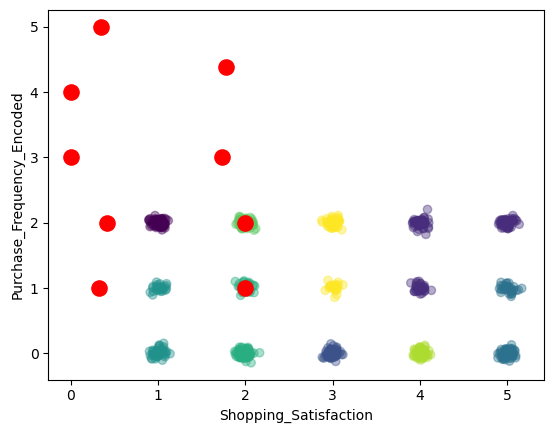

In [123]:
plt.scatter(
    x['Shopping_Satisfaction'] + np.random.normal(0, 0.05, size=len(x)),
    x['Purchase_Frequency_Encoded'] + np.random.normal(0, 0.05, size=len(x)),
    c=amazon['Cls9'],
    alpha=0.4)
plt.scatter(cent9[:,0],cent9[:,1],color='red',s=120)
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Purchase_Frequency_Encoded')
plt.show()

In [124]:
amazon.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction', 'Clothing_And_Fashion',
       'Beauty_And_Personal_Care', 'Groceries_And_Gourmet_Food',
       'Home_And_Kitchen', 'Others', 'Purchase_Frequency_Level',
       'Customer_Segment', 'Purchase_Frequency_Encoded', 'Cls9'],
      dtype='object')

In [129]:
A = amazon[['Purchase_Frequency_Encoded','Shopping_Satisfaction','Cls9']]

res = A.groupby('Cls9').mean()
res

,Purchase_Frequency_Encoded,Shopping_Satisfaction
Cls9,,
0,2.000000,1.00000
1,1.778523,4.38255
2,0.000000,3.00000
3,0.342857,5.00000
4,0.325000,1.00000
5,0.408602,2.00000
6,2.000000,2.00000
7,0.000000,4.00000
8,1.732558,3.00000


In [ ]:
'Shopping_Satisfaction'],x['Purchase_Frequency_Encoded'

In [130]:
res1 = pd.DataFrame({'Purchase_Frequency_Encoded':amazon['Purchase_Frequency_Encoded'].mean(),
                   'Shopping_Satisfaction':amazon['Shopping_Satisfaction'].mean()},index=['Avg'])
res1

,Purchase_Frequency_Encoded,Shopping_Satisfaction
Avg,1.01,3.0125


In [131]:
profiling = pd.concat([res1,res])
profiling

,Purchase_Frequency_Encoded,Shopping_Satisfaction
Avg,1.010000,3.01250
0,2.000000,1.00000
1,1.778523,4.38255
2,0.000000,3.00000
3,0.342857,5.00000
4,0.325000,1.00000
5,0.408602,2.00000
6,2.000000,2.00000
7,0.000000,4.00000
8,1.732558,3.00000


In [ ]:
## Task 4.1 : Examine the relationship between recommendation helpfulness and shopping satisfaction.

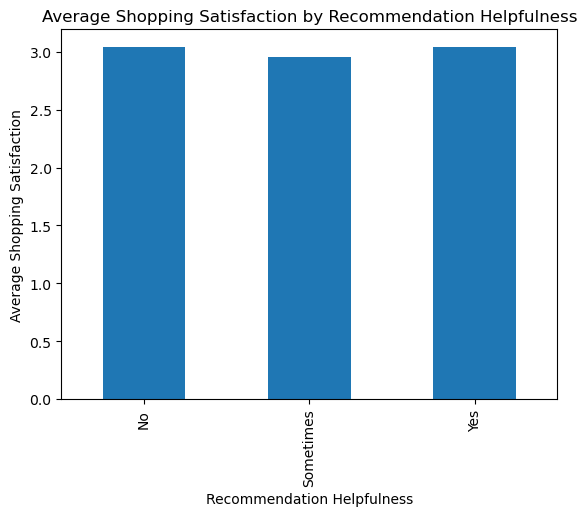

In [134]:
mean_satisfaction = (amazon.groupby('Recommendation_Helpfulness')['Shopping_Satisfaction'].mean().reindex(['No', 'Sometimes', 'Yes']))

mean_satisfaction.plot(kind='bar')

plt.title('Average Shopping Satisfaction by Recommendation Helpfulness')
plt.xlabel('Recommendation Helpfulness')
plt.ylabel('Average Shopping Satisfaction')
plt.show()

In [ ]:
## Task 4.2 : Evaluate how review reliability and helpfulness impact overall ratings.

                    count      mean  median
Review_Reliability                         
Heavily               167  3.023952     3.0
Moderately            156  3.205128     3.5
Never                 166  2.843373     3.0
Occasionally          161  2.857143     3.0
Rarely                150  2.920000     3.0


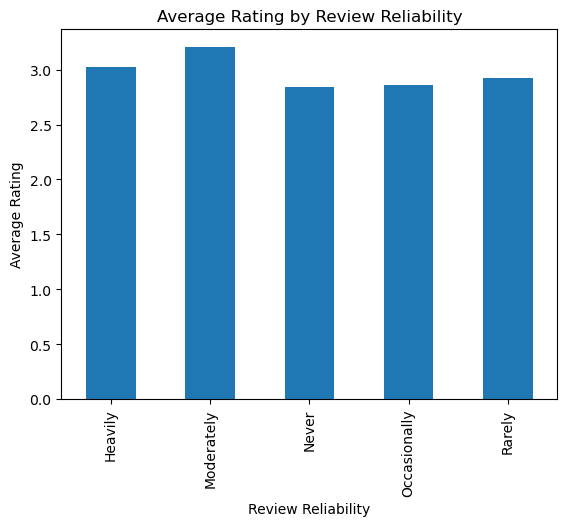

In [150]:
reliability_summary = (amazon.groupby('Review_Reliability')['Rating_Accuracy '].agg(['count', 'mean', 'median']))
print(reliability_summary)
reliability_summary['mean'].plot(kind='bar')
plt.title('Average Rating by Review Reliability')
plt.xlabel('Review Reliability')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
## Task 4.3 : Identify trends in how often customers engage with or trust personalized recommendations.(How Often Customers Engage with Recommendations)

Personalized_Recommendation_Frequency 
1    172
3    167
2    155
5    155
4    151
Name: count, dtype: int64


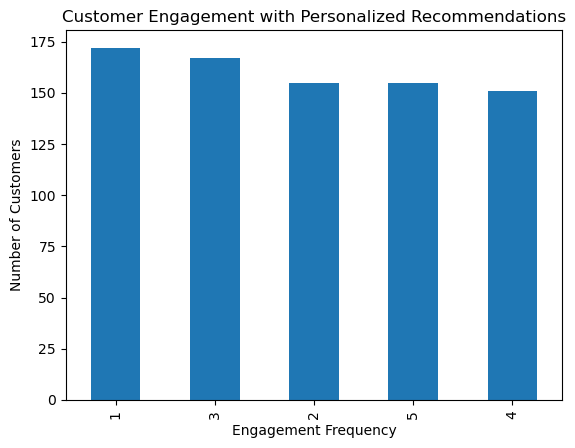

In [151]:
engagement_counts = amazon['Personalized_Recommendation_Frequency '].value_counts()
print(engagement_counts)

engagement_counts.plot(kind='bar')
plt.title('Customer Engagement with Personalized Recommendations')
plt.xlabel('Engagement Frequency')
plt.ylabel('Number of Customers')
plt.show()
## Shows whether customers engage frequently, occasionally, or rarely.

In [ ]:
## Task 4.4 : Suggest actionable insights for improving Amazon’s recommendation system

In [152]:
'''Prioritize high-quality signals (recent purchases, browsing depth, repeat views)

Reduce over-reliance on generic popularity-based recommendations

Filter out low-confidence recommendations for new users'''

'Prioritize high-quality signals (recent purchases, browsing depth, repeat views)\n\nReduce over-reliance on generic popularity-based recommendations\n\nFilter out low-confidence recommendations for new users'

Purchase_Categories
Clothing and Fashion          450
others                        412
Home and Kitchen              391
Beauty and Personal Care      383
Groceries and Gourmet Food    369
Name: count, dtype: int64


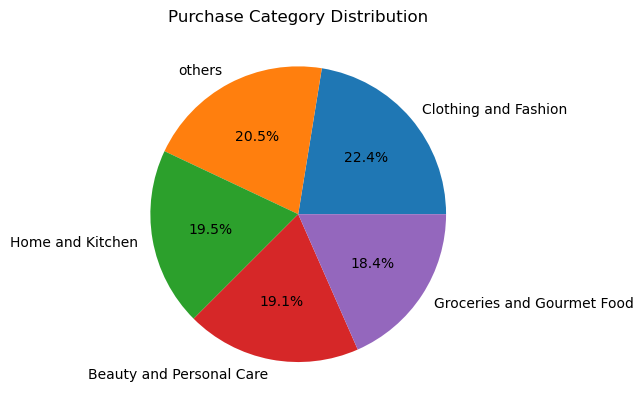

In [153]:
## Task 5.1.1: create visualization for Purchase categories
# Split multi-category entries into separate rows and Count Category

categories = (amazon['Purchase_Categories'].dropna().str.split(';').explode().str.strip())
category_counts = categories.value_counts()
print(category_counts)

plt.figure()
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Purchase Category Distribution')
plt.ylabel('')
plt.show()



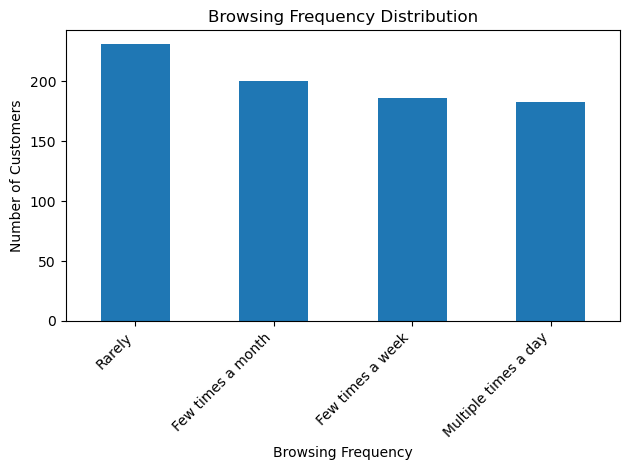

In [154]:
##Task 5.1.2 :  Create visualisation for Browsing frequency distribution
browsing_counts = amazon['Browsing_Frequency'].value_counts()

plt.figure()
browsing_counts.plot(kind='bar')
plt.title('Browsing Frequency Distribution')
plt.xlabel('Browsing Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


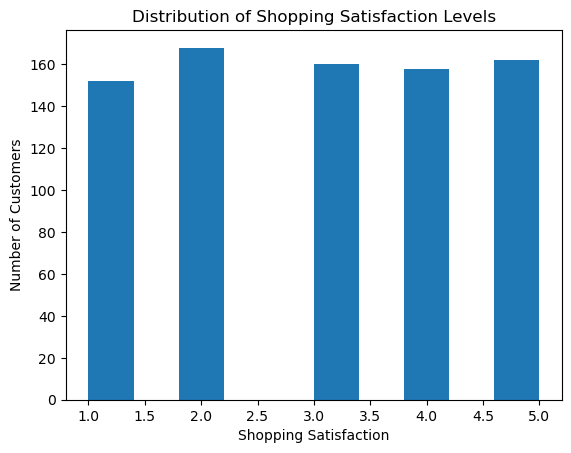

In [155]:
## Task 5.1.4
plt.figure()
plt.hist(amazon['Shopping_Satisfaction'].dropna(), bins=10)
plt.title('Distribution of Shopping Satisfaction Levels')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Number of Customers')
plt.show()
